# Part 1: Bernoulli Mixture Model: Theory

To train a Bernoulli Mixture Model, the formulae are:

- Expectation step

$$z_{n, k} \leftarrow \frac{\pi_k \prod_{i = 1}^D \mu_{k, i}^{x_{n, i}} (1 - \mu_{k, i})^{1 - x_{n, i}} }{\sum_{m = 1}^K \pi_m \prod_{i = 1}^D \mu_{m, i}^{x_{n, i}} (1 - \mu_{m, i})^{1 - x_{n, i}}}$$

- Maximization step

$$\mathbf{\mu_m} \leftarrow \mathbf{\bar{x}_m}$$

$$\pi_m \leftarrow \frac{N_m}{N}$$

where $\mathbf{\bar{x}_m} = \frac{1}{N_m} \sum_{n = 1}^N z_{n, m} \mathbf{x_n}$ and $N_m = \sum_{n = 1}^N z_{n, m}$

# Part 2: BMM Implementation

**(1)** see `bmm.py` for the complete implementation of the BMM

the source code of this project is available at https://github.com/toogy/mnist-em-bmm-gmm

In [1]:
# settings

data_path = '/home/data/ml/mnist'
k = 10

In [2]:
# we load pre-calculated k-means

import kmeans as kmeans_

kmeans = kmeans_.load_kmeans('kmeans-20.dat')

In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy

import bmm
import visualize

In [4]:
# loading the data
from mnist import load_mnist

train_data, train_labels = load_mnist(dataset='training', path=data_path)

# pre-processing the data (reshape + making it binary)

train_data = np.reshape(train_data, (60000, 784))
train_data_binary = np.where(train_data > 0.5, 1, 0)

In [5]:
# creating our model
model = bmm.bmm(k, n_iter=20, verbose=True)

In [6]:
model.fit(train_data_binary)

using random heuristic to initialize the means
[00] likelihood = -569.8413546973743 (elapsed 0:00:00.000035)
[01] likelihood = -190.57871265351196 (elapsed 0:00:03.884512)
[02] likelihood = -178.31881090836518 (elapsed 0:00:07.701479)
[03] likelihood = -173.8546323483073 (elapsed 0:00:11.555861)
[04] likelihood = -171.1387094080913 (elapsed 0:00:15.331171)
[05] likelihood = -169.76699789478005 (elapsed 0:00:19.070158)
[06] likelihood = -168.83053293568972 (elapsed 0:00:22.914634)
[07] likelihood = -168.0032973184975 (elapsed 0:00:26.672951)
[08] likelihood = -167.3066865599132 (elapsed 0:00:30.628975)
[09] likelihood = -166.78339821469532 (elapsed 0:00:34.128717)
[10] likelihood = -166.50773590565288 (elapsed 0:00:37.421146)
[11] likelihood = -166.32255197190665 (elapsed 0:00:40.621852)
[12] likelihood = -166.17791136374333 (elapsed 0:00:43.822942)
[13] likelihood = -166.07275183038118 (elapsed 0:00:47.062387)
[14] likelihood = -165.99362006215833 (elapsed 0:00:50.352406)
[15] likeliho

**(2)** Plot of the means $\mathbf{\mu}$ of the learnt mixture

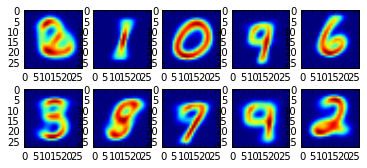

In [7]:
visualize.plot_means(model.means)

**(3)** It is not possible to have one center per class with only 10 components even though there are only 10 different digits. Multiple components can represent the same digits (as we can see from the plot). When this happens, it is not possible to represent all of them with only 10 components.

It is possible to avoid this by initializing each component's $\mu_k$ to the mean of the corresponding digit calculated from the labelized dataset. But then it becomes **supervised** learning, which is not what we want.

Here is the result with this kind of initialization:

In [8]:
model = bmm.bmm(10, verbose=True)
model.fit(train_data_binary, means_init_heuristic='data_classes_mean', labels=train_labels)

using data_classes_mean heuristic to initialize the means
[00] likelihood = -170.0721754394032 (elapsed 0:00:00.000022)
[01] likelihood = -168.48184456985467 (elapsed 0:00:03.266071)
[02] likelihood = -167.47609486286774 (elapsed 0:00:06.501935)
[03] likelihood = -166.86314656637327 (elapsed 0:00:09.820904)
[04] likelihood = -166.50318153203176 (elapsed 0:00:13.075299)
[05] likelihood = -166.2674235380959 (elapsed 0:00:16.297821)
[06] likelihood = -166.10039120351965 (elapsed 0:00:19.494645)
[07] likelihood = -165.99419530199302 (elapsed 0:00:22.746264)
[08] likelihood = -165.9117273097042 (elapsed 0:00:26.273457)
[09] likelihood = -165.8468430112527 (elapsed 0:00:29.542829)
[10] likelihood = -165.79296046410198 (elapsed 0:00:32.739198)
[11] likelihood = -165.75368606492944 (elapsed 0:00:35.973650)
[12] likelihood = -165.72760330768065 (elapsed 0:00:39.173245)
[13] likelihood = -165.70292977875587 (elapsed 0:00:42.399953)
[14] likelihood = -165.68259518731233 (elapsed 0:00:45.599497)
[

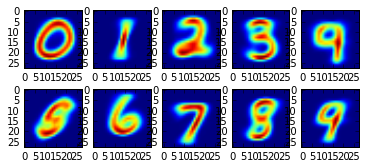

In [9]:
visualize.plot_means(model.means)

**(4)** For each label we select the subset of the data that corresponds to this label and train a `bmm` to represent the corresponding class. We then have 10 `bmm` which, together, form a digit classifier.

In [10]:
import classifier

# number of components for each BMM
k = 7

bayesian_classifier = classifier.classifier(k, means_init_heuristic='kmeans',
                                            means=kmeans, model_type='bmm')

bayesian_classifier.fit(train_data_binary, train_labels)

training label 0 (5923 samples)
converged in 33 iterations in 0:00:08.198690
training label 1 (6742 samples)
converged in 14 iterations in 0:00:04.321504
training label 2 (5958 samples)
converged in 48 iterations in 0:00:11.811318
training label 3 (6131 samples)
converged in 44 iterations in 0:00:10.952489
training label 4 (5842 samples)
converged in 101 iterations in 0:00:23.932060
training label 5 (5421 samples)
converged in 40 iterations in 0:00:08.983124
training label 6 (5918 samples)
converged in 37 iterations in 0:00:08.998669
training label 7 (6265 samples)
converged in 101 iterations in 0:00:26.344637
training label 8 (5851 samples)
converged in 51 iterations in 0:00:12.608800
training label 9 (5949 samples)
converged in 35 iterations in 0:00:09.203911


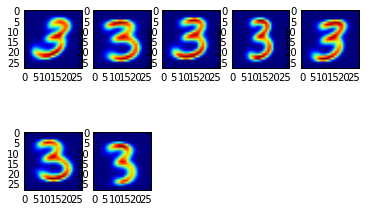

In [11]:
visualize.plot_means(bayesian_classifier.models[3].means)

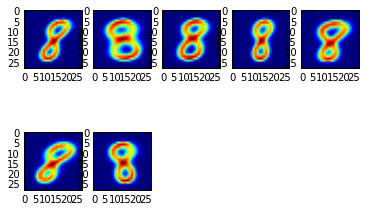

In [12]:
visualize.plot_means(bayesian_classifier.models[8].means)

In [13]:
test_data, test_labels = load_mnist(dataset='testing', path=data_path)
test_data = np.reshape(test_data, (test_data.shape[0], 784))
test_data_binary = np.where(test_data > 0.5, 1, 0)

label_set = set(train_labels)

predicted_labels = bayesian_classifier.predict(test_data_binary, label_set)

print('accuracy: {}'.format(np.mean(predicted_labels == test_labels)))

accuracy: 0.9201


# Part 3: Gaussian Mixture Models

BMM are adapted to binary images because they work with 0s and 1s. MNIST data initially was in the range $[0, 255]$. By binarizing the images, information is lost when it could make the model more accurate. GMM can work with real numbers and perform better than BMM for classifying digits.

The Gaussian mixture distribution can be written as a linear superposition of Gaussians in the form

$$p(\mathbf{x}) = \sum_{k=1}^K \pi_k \mathcal{N}(\mathbf{x}|\mathbf{\mu}_k, \mathbf{\Sigma}_k)$$

In [14]:
import sklearn.decomposition

d = 40

reducer = sklearn.decomposition.PCA(n_components=d)
reducer.fit(train_data)

train_data_reduced = reducer.transform(train_data)
test_data_reduced = reducer.transform(test_data)
kmeans_reduced = reducer.transform(kmeans)

In [15]:
import gmm

k = 20

model = gmm.gmm(k, verbose=True)
model.fit(train_data_reduced, means_init_heuristic='kmeans', means=kmeans_reduced)

using kmeans heuristic to initialize the means
initializing covars
[00] likelihood = -48.14527308243213 (elapsed 0:00:00.000024)
[01] likelihood = -45.06296249786608 (elapsed 0:00:00.288438)
[02] likelihood = -44.776319038156515 (elapsed 0:00:00.619868)
[03] likelihood = -44.72715272282866 (elapsed 0:00:00.918159)
[04] likelihood = -44.70893252620453 (elapsed 0:00:01.164549)
[05] likelihood = -44.698126124193905 (elapsed 0:00:01.405008)
[06] likelihood = -44.690411041386525 (elapsed 0:00:01.689520)
[07] likelihood = -44.68418697359688 (elapsed 0:00:01.941023)
[08] likelihood = -44.67918190960741 (elapsed 0:00:02.169632)
[09] likelihood = -44.674894754989495 (elapsed 0:00:02.373193)
[10] likelihood = -44.67102563613299 (elapsed 0:00:02.598962)
[11] likelihood = -44.66744938088715 (elapsed 0:00:02.868473)
[12] likelihood = -44.66416100176178 (elapsed 0:00:03.152530)
[13] likelihood = -44.66111778127396 (elapsed 0:00:03.424146)
[14] likelihood = -44.65822098011407 (elapsed 0:00:03.653982)

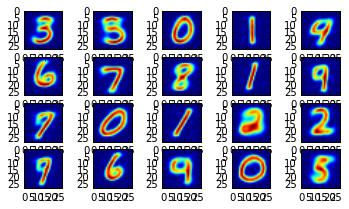

In [16]:
means_projected = reducer.inverse_transform(model.means)
visualize.plot_means(means_projected)

### Classification using a GMM with a diagonal covariance matrix

In [17]:
bayesian_classifier = classifier.classifier(k, model_type='gmm',
                                            means_init_heuristic='kmeans',
                                            means=kmeans_reduced,
                                            covariance_type='diag')
bayesian_classifier.fit(train_data_reduced, train_labels)

training label 0 (5923 samples)
converged in 65 iterations in 0:00:01.213738
training label 1 (6742 samples)
converged in 74 iterations in 0:00:01.788544
training label 2 (5958 samples)
converged in 37 iterations in 0:00:00.952608
training label 3 (6131 samples)
converged in 26 iterations in 0:00:00.585228
training label 4 (5842 samples)
converged in 40 iterations in 0:00:00.841749
training label 5 (5421 samples)
converged in 66 iterations in 0:00:01.227099
training label 6 (5918 samples)
converged in 34 iterations in 0:00:00.806983
training label 7 (6265 samples)
converged in 48 iterations in 0:00:01.382043
training label 8 (5851 samples)
converged in 39 iterations in 0:00:00.866910
training label 9 (5949 samples)
converged in 68 iterations in 0:00:01.304171


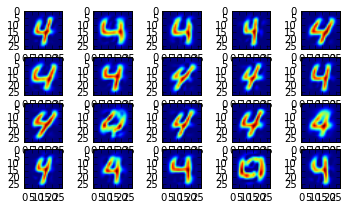

In [18]:
means_projected = reducer.inverse_transform(bayesian_classifier.models[4].means)
visualize.plot_means(means_projected)

In [19]:
predicted_labels = bayesian_classifier.predict(test_data_reduced, label_set)

print('accuracy: {}'.format(np.mean(predicted_labels == test_labels)))

accuracy: 0.9474


The results are a little better than with the BMM

### Classification using a GMM with a full covariance matrix

In [20]:
bayesian_classifier = classifier.classifier(k, model_type='gmm',
                                            means_init_heuristic='kmeans',
                                            means=kmeans_reduced,
                                            covariance_type='full')
bayesian_classifier.fit(train_data_reduced, train_labels)

training label 0 (5923 samples)
converged in 40 iterations in 0:00:07.932541
training label 1 (6742 samples)
converged in 35 iterations in 0:00:06.455700
training label 2 (5958 samples)
converged in 101 iterations in 0:00:20.237102
training label 3 (6131 samples)
converged in 87 iterations in 0:00:17.337337
training label 4 (5842 samples)
converged in 45 iterations in 0:00:08.870159
training label 5 (5421 samples)
converged in 66 iterations in 0:00:10.676941
training label 6 (5918 samples)
converged in 31 iterations in 0:00:05.561576
training label 7 (6265 samples)
converged in 58 iterations in 0:00:10.070746
training label 8 (5851 samples)
converged in 79 iterations in 0:00:12.722273
training label 9 (5949 samples)
converged in 38 iterations in 0:00:06.375860


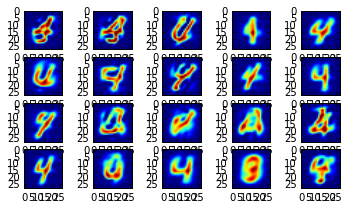

In [21]:
means_projected = reducer.inverse_transform(bayesian_classifier.models[4].means)
visualize.plot_means(means_projected)

In [22]:
predicted_labels = bayesian_classifier.predict(test_data_reduced, label_set)

print('accuracy: {}'.format(np.mean(predicted_labels == test_labels)))

accuracy: 0.9685
